In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
mnist = tf.keras.datasets.mnist

In [14]:
(x_train, y_train) , (x_test, y_test)=mnist.load_data()

In [15]:
x_train.shape

(60000, 28, 28)

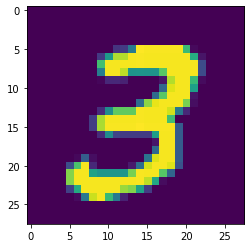

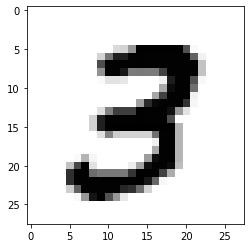

In [16]:
plt.imshow(x_train[7])
plt.show()
plt.imshow(x_train[7] , cmap=plt.cm.binary)

In [17]:
print(x_train[7])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 13

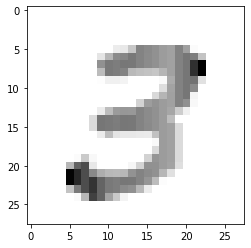

In [18]:
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)
plt.imshow(x_train[7] , cmap=plt.cm.binary)

In [19]:
print(x_train[7])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [20]:
print(y_train[7])

3


In [22]:
IMG_SIZE=28
x_trainr= np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr= np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [24]:
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Deep Learing**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D , MaxPooling2D

In [28]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [30]:
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [33]:
model.add(Dense(32))
model.add(Activation("relu"))

In [34]:
model.add(Dense(10))
model.add(Activation("softmax"))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_1 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_2 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [37]:
len(x_trainr)

60000

In [38]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="adam" , metrics=['accuracy'])

In [40]:
model.fit(x_trainr , y_train , epochs=5 , validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 87s 67ms/step - loss: 0.1665 - accuracy: 0.9494 - val_loss: 0.1654 - val_accuracy: 0.9492
Epoch 2/5
1313/1313 [==============================] - 93s 70ms/step - loss: 0.0936 - accuracy: 0.9710 - val_loss: 0.0867 - val_accuracy: 0.9735
Epoch 3/5
1313/1313 [==============================] - 92s 70ms/step - loss: 0.0702 - accuracy: 0.9788 - val_loss: 0.0736 - val_accuracy: 0.9783
Epoch 4/5
1313/1313 [==============================] - 77s 58ms/step - loss: 0.0539 - accuracy: 0.9829 - val_loss: 0.0687 - val_accuracy: 0.9793
Epoch 5/5
1313/1313 [==============================] - 89s 68ms/step - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0654 - val_accuracy: 0.9805


In [41]:
loss , accuracy = model.evaluate(x_testr , y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0680 - accuracy: 0.9793


In [42]:
print(loss)
print(accuracy)

0.06798645853996277
0.9793000221252441


In [43]:
predict = model.predict([x_testr])

313/313 [==============================] - 9s 27ms/step


In [44]:
np.argmax(predict[7])

9

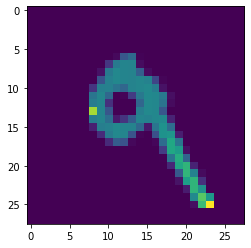

In [45]:
plt.imshow(x_test[7])